In [1]:
#loading necessary python modules
import numpy #mathematical data manipulation

import pandas #for manipulating numerical tables and time series

import matplotlib.pyplot #for plotting figures

In [2]:
#loading data
filename = '/Users/hfah3938/Desktop/cobalt-is-cool-master/Week8/data/EarthChemCO.txt'

data=numpy.loadtxt(filename, delimiter=',',skiprows=1)

In [3]:
print(data.shape) #all deposits in the data set

(185871, 4)


In [8]:
worldlarge=data[data[:,3]>1000]

In [9]:
print(worldlarge.shape) #total in world over 1000ppm

(1429, 4)


In [5]:
where_longitude_above_min = data[:,1]>-90
data1=data[where_longitude_above_min]
where_longitude_below_max = data1[:,1]<-25
data2=data1[where_longitude_below_max]
#Lats
data3=data2[data2[:,0]<15]
data4=data3[data3[:,0]>-60]

sampleData=data4[data4[:,3]>1000]

In [18]:
print(data4.shape) #total in south america

(4919, 4)


In [6]:
print(sampleData.shape) #over 1000ppm in south america

(2, 4)


In [17]:
print(sampleData)

[[   7.55  -60.8  3150.   2000.  ]
 [   7.55  -60.8  3150.   2000.  ]]


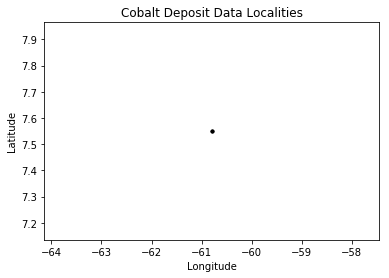

In [7]:
#plotting the location of each data point
matplotlib.pyplot.plot(sampleData[:,1],sampleData[:,0],'k.')
matplotlib.pyplot.title('Cobalt Deposit Data Localities')
matplotlib.pyplot.ylabel('Latitude')
matplotlib.pyplot.xlabel('Longitude')
matplotlib.pyplot.show()

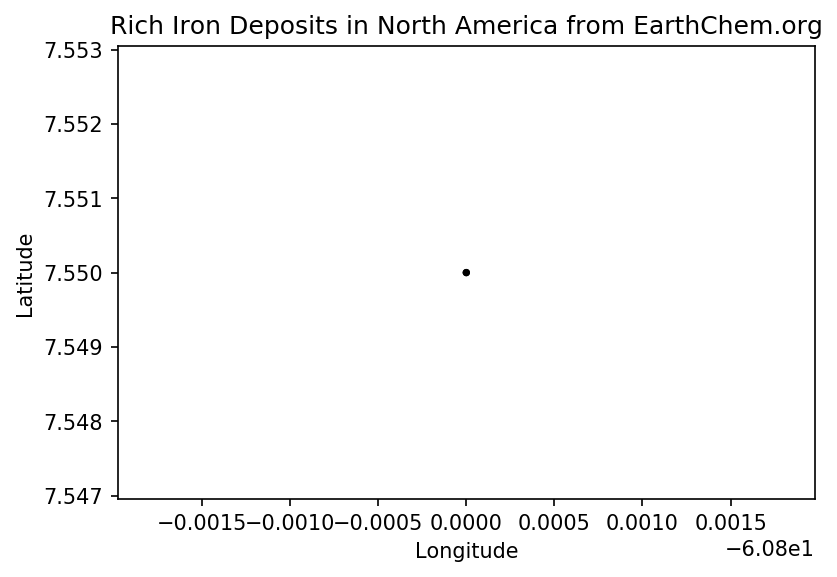

In [12]:
#plot
lats=sampleData[:,0]
longs=sampleData[:,1]
age=sampleData[:,2]
abundence=sampleData[:,3]


fig = matplotlib.pyplot.figure(figsize=(6,4),dpi=150)

matplotlib.pyplot.scatter(longs,lats,s=age/500,c=abundence,vmin=0, vmax=770000,cmap=matplotlib.pyplot.cm.copper)
matplotlib.pyplot.title('Rich Iron Deposits in North America from EarthChem.org')
matplotlib.pyplot.ylabel('Latitude')
matplotlib.pyplot.xlabel('Longitude')
matplotlib.pyplot.show()

In [14]:
import cartopy.crs #module for plotting on a global map

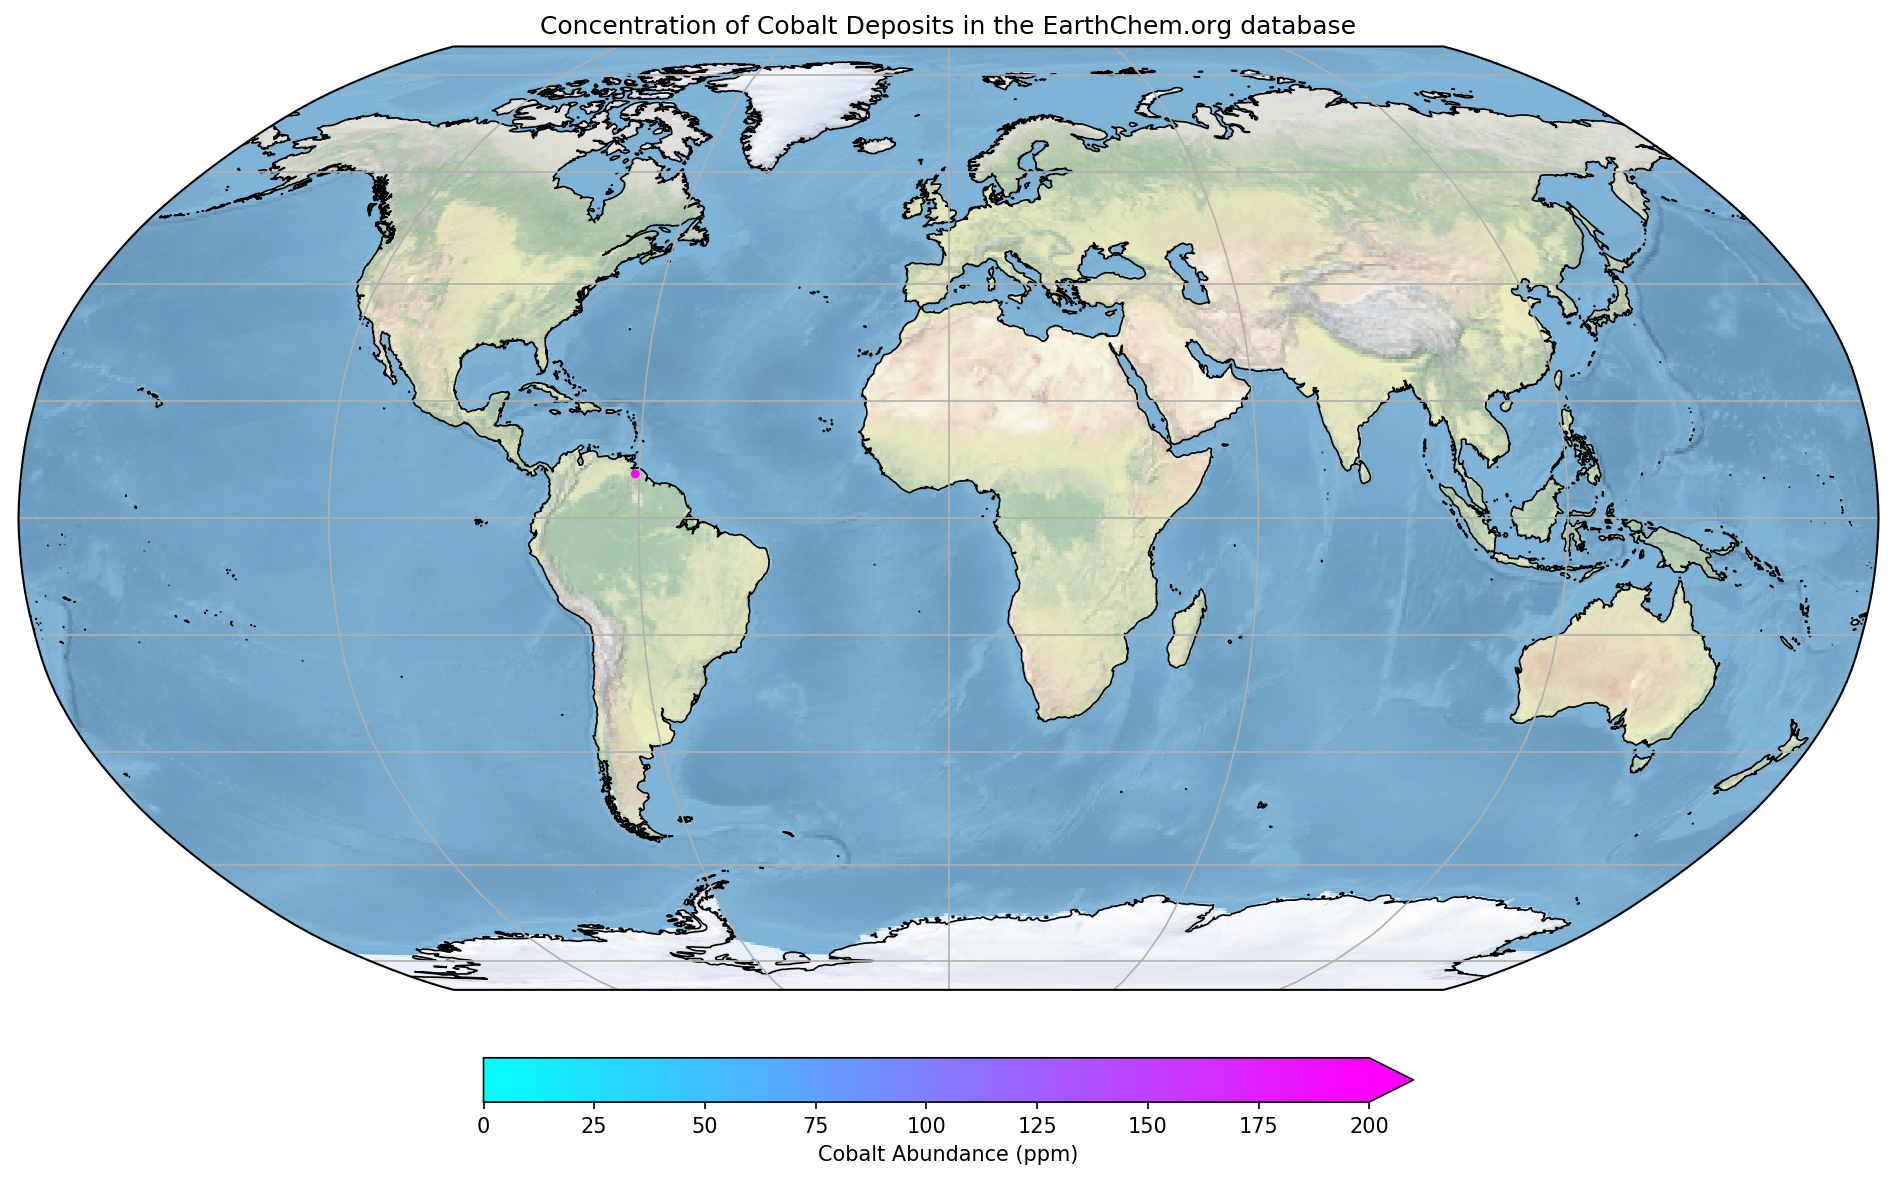

In [16]:
#Plotting final cobalt deposit concentrations map
fig = matplotlib.pyplot.figure(figsize=(16,12),dpi=150)

ax = matplotlib.pyplot.axes(projection=cartopy.crs.Robinson()) #map projection to plot over.

#Earth-specific details from cartopy module
ax.set_global()
ax.coastlines('50m', linewidth=0.8)
ax.stock_img()
ax.gridlines()

#plotting cobalt abundence and location data
mapscat=ax.scatter(longs,lats,marker=".",c=abundence,vmin=0,vmax=200,transform=cartopy.crs.Geodetic(),zorder=4,cmap=matplotlib.pyplot.cm.cool)

cbar=matplotlib.pyplot.colorbar(mapscat, ax=ax, orientation="horizontal", pad=0.05, fraction=0.15, shrink=0.5,extend='max')
cbar.set_label('Cobalt Abundance (ppm)')

matplotlib.pyplot.title('Concentration of Cobalt Deposits in the EarthChem.org database')
matplotlib.pyplot.show()